# Credit Risk Modeling in Python

## Exploring and Preparing Loan Data

### Exploring with Cross Tables

In [1]:
import pandas as pd

In [2]:
raw_data = pd.read_csv('cr_loan2.csv')

In [3]:
raw_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
pd.crosstab(raw_data['person_home_ownership'],raw_data['loan_status'],values=raw_data['loan_int_rate'],aggfunc='mean').round(2)

loan_status,0,1
person_home_ownership,,
MORTGAGE,10.06,13.43
OTHER,11.41,13.56
OWN,10.75,12.24
RENT,10.75,12.97


In [5]:
import matplotlib.pyplot as plt

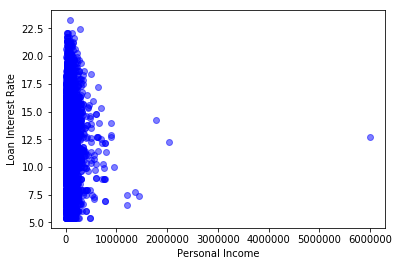

In [6]:
plt.scatter(raw_data['person_income'],raw_data['loan_int_rate'],c='blue',alpha=0.5)
plt.xlabel("Personal Income")
plt.ylabel("Loan Interest Rate")
plt.show()

In [7]:
# Create the cross table for loan status, home ownership, and the max employment length
print(pd.crosstab(raw_data['loan_status'],raw_data['person_home_ownership'],
                  values=raw_data['person_emp_length'], aggfunc='max'))

# Create an array of indices where employment length is greater than 60
indices = raw_data[raw_data['person_emp_length'] > 60].index

# Drop the records from the data based on the indices and create a new dataframe
cr_loan_new = raw_data.drop(indices)
print(pd.crosstab(cr_loan_new['loan_status'],cr_loan_new['person_home_ownership'],
            values=cr_loan_new['person_emp_length'], aggfunc=['min','max']))

person_home_ownership  MORTGAGE  OTHER   OWN   RENT
loan_status                                        
0                         123.0   24.0  31.0   41.0
1                          34.0   11.0  17.0  123.0
                           min                      max                  
person_home_ownership MORTGAGE OTHER  OWN RENT MORTGAGE OTHER   OWN  RENT
loan_status                                                              
0                          0.0   0.0  0.0  0.0     38.0  24.0  31.0  41.0
1                          0.0   0.0  0.0  0.0     34.0  11.0  17.0  27.0


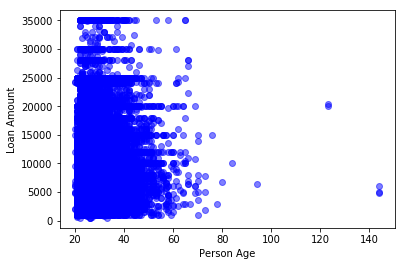

In [8]:
# Create the scatter plot for age and amount
plt.scatter(raw_data['person_age'], raw_data['loan_amnt'], c='blue', alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")
plt.show()

In [9]:
# Create the cross table for loan status, home ownership, and the max employment length
print(pd.crosstab(raw_data['loan_status'],raw_data['person_home_ownership'],
                  values=raw_data['person_emp_length'], aggfunc='max'))

# Create an array of indices where employment length is greater than 60
indices = raw_data[raw_data['person_emp_length'] > 60].index

# Drop the records from the data based on the indices and create a new dataframe
cr_loan_new = raw_data.drop(indices)
print(pd.crosstab(cr_loan_new['loan_status'],cr_loan_new['person_home_ownership'],
            values=cr_loan_new['person_emp_length'], aggfunc=['min','max']))

person_home_ownership  MORTGAGE  OTHER   OWN   RENT
loan_status                                        
0                         123.0   24.0  31.0   41.0
1                          34.0   11.0  17.0  123.0
                           min                      max                  
person_home_ownership MORTGAGE OTHER  OWN RENT MORTGAGE OTHER   OWN  RENT
loan_status                                                              
0                          0.0   0.0  0.0  0.0     38.0  24.0  31.0  41.0
1                          0.0   0.0  0.0  0.0     34.0  11.0  17.0  27.0


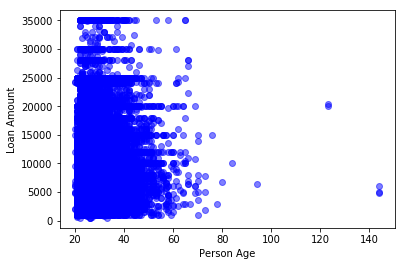

In [10]:
# Create the scatter plot for age and amount
plt.scatter(raw_data['person_age'], raw_data['loan_amnt'], c='blue', alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")
plt.show()

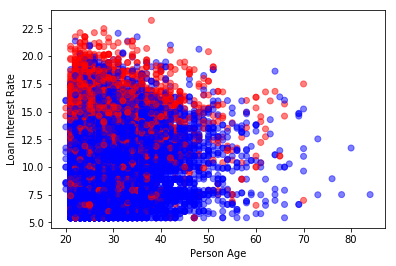

In [11]:
import matplotlib.colors as mcolors
# Use Pandas to drop the record from the data frame and create a new one
cr_loan_new = raw_data.drop(raw_data[raw_data['person_age'] > 100].index)

# Create a scatter plot of age and interest rate
colors = ["blue","red"]
plt.scatter(cr_loan_new['person_age'], cr_loan_new['loan_int_rate'],
            c = cr_loan_new['loan_status'],
            cmap = mcolors.ListedColormap(colors),
            alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Interest Rate")
plt.show()

Index(['person_emp_length', 'loan_int_rate'], dtype='object')
     person_age  person_income person_home_ownership  person_emp_length  \
105          22          12600              MORTGAGE                NaN   
222          24         185000              MORTGAGE                NaN   
379          24          16800              MORTGAGE                NaN   
407          25          52000                  RENT                NaN   
408          22          17352              MORTGAGE                NaN   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
105           PERSONAL          A       2000           5.42            1   
222          EDUCATION          B      35000          12.42            0   
379  DEBTCONSOLIDATION          A       3900            NaN            1   
407           PERSONAL          B      24000          10.74            1   
408          EDUCATION          C       2250          15.27            0   

     loan_percent_income cb_pe

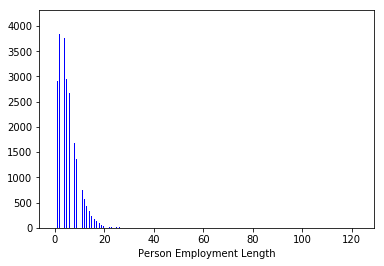

In [12]:
# Print a null value column array
print(raw_data.columns[raw_data.isnull().any()])

# Print the top five rows with nulls for employment length
print(raw_data[raw_data['person_emp_length'].isnull()].head())

# Impute the null values with the median value for all employment lengths
raw_data['person_emp_length'].fillna((raw_data['person_emp_length'].median()), inplace=True)

# Create a histogram of employment length
n, bins, patches = plt.hist(raw_data['person_emp_length'], bins='auto', color='blue')
plt.xlabel("Person Employment Length")
plt.show()

In [13]:
# Print the number of nulls
print(raw_data['loan_int_rate'].isnull().sum())

# Store the array on indices
indices = raw_data[raw_data['loan_int_rate'].isnull()].index

# Save the new data without missing data
cr_loan_clean = raw_data.drop(indices)


3116


In [14]:
cr_loan_clean.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


## Logistic Regression for Defaults

In [15]:
from sklearn.linear_model import LogisticRegression
# Create the X and y data sets
X = cr_loan_clean[['loan_int_rate']]
y = cr_loan_clean[['loan_status']]

# Create and fit a logistic regression model
clf_logistic_single = LogisticRegression(solver='lbfgs')
clf_logistic_single.fit(X, np.ravel(y))

# Print the parameters of the model
print(clf_logistic_single.get_params())

# Print the intercept of the model
print(clf_logistic_single.intercept_)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
[-4.4586918]


In [16]:
# Create X data for the model
X_multi = cr_loan_clean[['loan_int_rate','person_emp_length']]

# Create a set of y data for training
y = cr_loan_clean[['loan_status']]

# Create and train a new logistic regression
clf_logistic_multi = LogisticRegression(solver='lbfgs').fit(X_multi, np.ravel(y))

# Print the intercept of the model
print(clf_logistic_multi.intercept_)

[-4.2253171]


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Create the X and y data sets
X = cr_loan_clean[['loan_int_rate','person_emp_length','person_income']]
y = cr_loan_clean[['loan_status']]

# Use test_train_split to create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

# Create and fit the logistic regression model
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Print the models coefficients
print(clf_logistic.coef_)

[[ 8.34020099e-02 -6.02470833e-02 -3.28983416e-05]]


#### One - Hot Encoding

In [18]:
# Create two data sets for numeric and non-numeric data
cred_num = cr_loan_clean.select_dtypes(exclude=['object'])
cred_str = cr_loan_clean.select_dtypes(include=['object'])

# One-hot encode the non-numeric columns
cred_str_onehot = pd.get_dummies(cred_str)

# Union the one-hot encoded columns to the numeric ones
cr_loan_prep = pd.concat([cred_num, cred_str_onehot], axis=1)

# Print the columns in the new data set
print(cr_loan_prep.columns)

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y'],
      dtype='object')


In [19]:
X_lr=cr_loan_prep.drop(['loan_status'],axis=1)
y_lr=cr_loan_prep['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X_lr, y_lr, test_size=0.4, random_state=40)
# Train the logistic regression model on the training data
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Create predictions of probability for loan status using test data
preds = clf_logistic.predict_proba(X_test)

# Create dataframes of first five predictions, and first five true labels
lr_preds_df = pd.DataFrame(preds[:,1][0:5], columns = ['prob_default'])
lr_true_df = y_test.head()

# Concatenate and print the two data frames for comparison
print(pd.concat([lr_true_df.reset_index(drop = True), lr_preds_df], axis = 1))

   loan_status  prob_default
0            0      0.016326
1            0      0.325536
2            0      0.227952
3            1      0.204449
4            1      0.151883


In [20]:
import pickle 
  
# Save the trained model as a pickle string. 
saved_lr = pickle.dumps(clf_logistic) 

In [21]:
from sklearn.metrics import classification_report

# Create a dataframe for the probabilities of default
lr_preds_df = pd.DataFrame(preds[:,1], columns = ['prob_default'])

# Reassign loan status based on the threshold
lr_preds_df['loan_status'] = lr_preds_df['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)

# Print the row counts for each loan status
print(lr_preds_df['loan_status'].value_counts())

# Print the classification report
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, lr_preds_df['loan_status'], target_names=target_names))

0    11220
1      566
Name: loan_status, dtype: int64
              precision    recall  f1-score   support

 Non-Default       0.81      0.98      0.89      9215
     Default       0.75      0.16      0.27      2571

   micro avg       0.81      0.81      0.81     11786
   macro avg       0.78      0.57      0.58     11786
weighted avg       0.80      0.81      0.75     11786



In [22]:
from sklearn.metrics import precision_recall_fscore_support
# Print the classification report
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, lr_preds_df['loan_status'], target_names=target_names))

# Print all the non-average values from the report
print(precision_recall_fscore_support(y_test,lr_preds_df['loan_status']))

# Print the first two numbers from the report
print(precision_recall_fscore_support(y_test,lr_preds_df['loan_status'])[0:2])

              precision    recall  f1-score   support

 Non-Default       0.81      0.98      0.89      9215
     Default       0.75      0.16      0.27      2571

   micro avg       0.81      0.81      0.81     11786
   macro avg       0.78      0.57      0.58     11786
weighted avg       0.80      0.81      0.75     11786

(array([0.80864528, 0.74911661]), array([0.98459034, 0.16491637]), array([0.8879863 , 0.27032196]), array([9215, 2571]))
(array([0.80864528, 0.74911661]), array([0.98459034, 0.16491637]))


0.8057865263872391


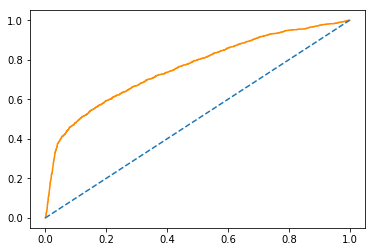

In [23]:
import sklearn.metrics as metrics
# Create predictions and store them in a variable
preds = clf_logistic.predict_proba(X_test)

# Print the accuracy score the model
print(clf_logistic.score(X_test, y_test))

# Plot the ROC curve of the probabilities of default
prob_default = preds[:, 1]
fallout, sensitivity, thresholds = metrics.roc_curve(y_test, prob_default)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

# Compute the AUC and store it in a variable
auc = metrics.roc_auc_score(y_test, prob_default)

In [24]:
# Set the threshold for defaults to 0.5
lr_preds_df['loan_status'] = lr_preds_df['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)

# Print the confusion matrix
print(metrics.confusion_matrix(y_test,lr_preds_df['loan_status']))

[[9073  142]
 [2147  424]]


In [25]:
lr_preds_df['prob_default'].head()

0    0.016326
1    0.325536
2    0.227952
3    0.204449
4    0.151883
Name: prob_default, dtype: float64

In [26]:
avg_loan_amnt=np.mean(cr_loan_clean.loan_amnt)
# Reassign the values of loan status based on the new threshold
lr_preds_df['loan_status'] = lr_preds_df['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)

# Store the number of loan defaults from the prediction data
num_defaults = lr_preds_df['loan_status'].value_counts()[1]

# Store the default recall from the classification report

default_recall = precision_recall_fscore_support(y_test,lr_preds_df['loan_status'])[1][1]
# Calculate the estimated impact of the new default recall rate
print(num_defaults * avg_loan_amnt * (1 - default_recall))

9866471.23626889


In [27]:
y_test_new=y_test.reset_index()

In [28]:
thresh=[0.2, 0.225,0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625,0.65]
def_recalls=[]
nondef_recalls=[]
acc =[]
for i in thresh:
    lr_preds_df['loan_status'] = lr_preds_df['prob_default'].apply(lambda x: 1 if x > i else 0)
    # Store the number of loan defaults from the prediction data
    num_defaults = lr_preds_df['loan_status'].value_counts()[1]

    # Store the default recall from the classification report

    def_recalls.append(precision_recall_fscore_support(y_test,lr_preds_df['loan_status'])[1][1])
    nondef_recalls.append(precision_recall_fscore_support(y_test,lr_preds_df['loan_status'])[1][0])
    overlap=0
    for j in range(len(y_test)):
        overlap+=(y_test_new['loan_status'][j]==lr_preds_df['loan_status'][j])   
    acc.append(overlap/len(y_test))

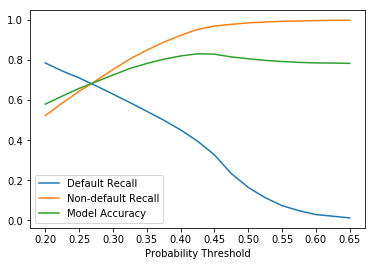

In [29]:
ticks=[0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65]
plt.plot(thresh,def_recalls)
plt.plot(thresh,nondef_recalls)
plt.plot(thresh,acc)
plt.xlabel("Probability Threshold")
plt.xticks(ticks)
plt.legend(["Default Recall","Non-default Recall","Model Accuracy"])
plt.show()

## Gradient Boosted Trees Using XGBoost

In [30]:
cr_loan_prep=pd.read_csv('cr_loan_w2.csv')
X=cr_loan_prep.drop(['loan_status'],axis=1)
y=cr_loan_prep['loan_status']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=11)

In [32]:
cr_loan_prep

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,21,9600,5,1000,11.14,0,0.10,2,0,0,...,0,0,1,0,0,0,0,0,1,0
1,25,9600,1,5500,12.87,1,0.57,3,1,0,...,0,0,0,1,0,0,0,0,1,0
2,23,65500,4,35000,15.23,1,0.53,2,0,0,...,0,0,0,1,0,0,0,0,1,0
3,24,54400,8,35000,14.27,1,0.55,4,0,0,...,0,0,0,1,0,0,0,0,0,1
4,21,9900,2,2500,7.14,1,0.25,2,0,0,...,1,1,0,0,0,0,0,0,1,0
5,26,77100,8,35000,12.42,1,0.45,3,0,0,...,0,0,1,0,0,0,0,0,1,0
6,24,78956,5,35000,11.11,1,0.44,4,0,0,...,0,0,1,0,0,0,0,0,1,0
7,24,83000,8,35000,8.90,1,0.42,2,0,0,...,0,1,0,0,0,0,0,0,1,0
8,21,10000,6,1600,14.74,1,0.16,3,0,0,...,1,0,0,0,1,0,0,0,1,0
9,22,85000,6,35000,10.37,1,0.41,4,0,0,...,1,0,1,0,0,0,0,0,1,0


In [33]:
# Train a model
import xgboost as xgb
clf_gbt = xgb.XGBClassifier().fit(X_train, np.ravel(y_train))

# Predict with a model
gbt_preds = clf_gbt.predict_proba(X_test)

# Create dataframes of first five predictions, and first five true labels
gbt_preds_df = pd.DataFrame(gbt_preds[:,1][0:5], columns = ['prob_default'])
gbt_true_df = y_test.head()

# Concatenate and print the two data frames for comparison
print(pd.concat([gbt_true_df.reset_index(drop = True), gbt_preds_df], axis = 1))

   loan_status  prob_default
0            0      0.073651
1            0      0.041342
2            0      0.058791
3            1      0.898228
4            0      0.056531


In [34]:
cr_loan_prep.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,21,9600,5,1000,11.14,0,0.10,2,0,0,...,0,0,1,0,0,0,0,0,1,0
1,25,9600,1,5500,12.87,1,0.57,3,1,0,...,0,0,0,1,0,0,0,0,1,0
2,23,65500,4,35000,15.23,1,0.53,2,0,0,...,0,0,0,1,0,0,0,0,1,0
3,24,54400,8,35000,14.27,1,0.55,4,0,0,...,0,0,0,1,0,0,0,0,0,1
4,21,9900,2,2500,7.14,1,0.25,2,0,0,...,1,1,0,0,0,0,0,0,1,0


In [35]:
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Create predictions of probability for loan status using test data
lr_prob_default = clf_logistic.predict_proba(X_test)

# Create dataframes of first five predictions, and first five true labels
lr_preds_df = pd.DataFrame(preds[:,1], columns = ['lr_prob_default'])

In [36]:
clf_gbt = xgb.XGBClassifier().fit(X_train, np.ravel(y_train))

# Predict with a model
gbt_prob_default = clf_gbt.predict_proba(X_test)

# Create dataframes of first five predictions, and first five true labels
gbt_preds_df = pd.DataFrame(gbt_preds[:,1], columns = ['gbt_prob_default'])

In [37]:
gbt_preds_df['lr_preds_df']=lr_preds_df

In [38]:
gbt_preds_df['lgd']=0.2

In [39]:
gbt_preds_df['loan_amnt']=X_test.reset_index()['loan_amnt']

In [40]:
gbt_preds_df.columns=['gbt_prob_default', 'lr_prob_default', 'lgd', 'loan_amnt']

In [41]:
portfolio=gbt_preds_df

In [42]:
portfolio['gbt_expected_loss'] = portfolio['loan_amnt'] * portfolio['lgd'] * portfolio['gbt_prob_default']
portfolio['lr_expected_loss'] = portfolio['loan_amnt'] * portfolio['lgd'] * portfolio['lr_prob_default']

# Print the sum of the expected loss for lr
print('LR expected loss: ', np.sum(portfolio['lr_expected_loss']))

# Print the sum of the expected loss for gbt
print('GBT expected loss: ', np.sum(portfolio['gbt_expected_loss']))

LR expected loss:  5234638.379427656
GBT expected loss:  5481173.958035672


In [43]:
# Predict the labels for loan status
gbt_preds = clf_gbt.predict(X_test)

# Check the values created by the predict method
print(gbt_preds)

# Print the classification report of the model
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, gbt_preds, target_names=target_names))

[0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

 Non-Default       0.92      0.99      0.95      9186
     Default       0.95      0.69      0.80      2598

   micro avg       0.92      0.92      0.92     11784
   macro avg       0.93      0.84      0.88     11784
weighted avg       0.93      0.92      0.92     11784



In [47]:
X = cr_loan_prep[['person_income','loan_int_rate',
                  'loan_percent_income','loan_amnt',
                  'person_home_ownership_MORTGAGE','loan_grade_F']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
# Create and train the model on the training data
clf_gbt = xgb.XGBClassifier().fit(X_train,np.ravel(y_train))

# Print the column importances from the model
print(clf_gbt.get_booster().get_score(importance_type = 'weight'))

{'loan_percent_income': 104, 'loan_int_rate': 182, 'person_income': 296, 'person_home_ownership_MORTGAGE': 38, 'loan_amnt': 51, 'loan_grade_F': 11}


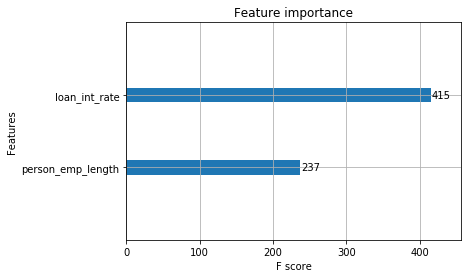

In [48]:
X2 = cr_loan_prep[['loan_int_rate','person_emp_length']]
X3 = cr_loan_prep[['person_income','loan_int_rate','loan_percent_income']]
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.4, random_state=42)
# Train a model on the X data with 2 columns
clf_gbt2 = xgb.XGBClassifier().fit(X2_train,np.ravel(y_train))

# Plot the column importance for this model
xgb.plot_importance(clf_gbt2, importance_type = 'weight')
plt.show()

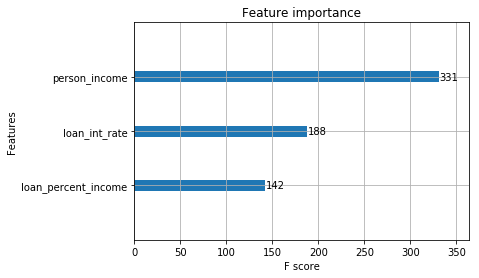

In [49]:
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size=0.4, random_state=42)
# Train a model on the X data with 3 columns
clf_gbt3 = xgb.XGBClassifier().fit(X3_train,np.ravel(y_train))

# Plot the column importance for this model
xgb.plot_importance(clf_gbt3, importance_type = 'weight')
plt.show()

In [50]:
X=cr_loan_prep[['person_income', 'loan_int_rate', 'loan_percent_income', 'loan_amnt', 'person_home_ownership_MORTGAGE']]
X2=cr_loan_prep[['person_income', 'loan_int_rate', 'loan_percent_income', 'person_emp_length', 'person_home_ownership_RENT']]
y=cr_loan_prep['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.4, random_state=42)
gbt = xgb.XGBClassifier().fit(X_train,np.ravel(y_train))
gbt2 = xgb.XGBClassifier().fit(X2_train,np.ravel(y_train))
# Predict the loan_status using each model
gbt_preds = gbt.predict(X_test)
gbt2_preds = gbt2.predict(X2_test)

# Print the classification report of the first model
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, gbt_preds, target_names=target_names))

# Print the classification report of the second model
print(classification_report(y_test, gbt2_preds, target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.90      0.96      0.93      9186
     Default       0.83      0.61      0.70      2598

   micro avg       0.89      0.89      0.89     11784
   macro avg       0.86      0.79      0.82     11784
weighted avg       0.88      0.89      0.88     11784

              precision    recall  f1-score   support

 Non-Default       0.90      0.99      0.94      9186
     Default       0.92      0.60      0.73      2598

   micro avg       0.90      0.90      0.90     11784
   macro avg       0.91      0.79      0.83     11784
weighted avg       0.90      0.90      0.89     11784



### Cross validating credit models

In [51]:
params={'eval_metric': 'auc', 'objective': 'binary:logistic', 'seed': 123}
X= cr_loan_prep.drop(['loan_status'],axis=1)
y=cr_loan_prep['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=40)
# Set the values for number of folds and stopping iterations
n_folds = 5
early_stopping = 10

# Create the DTrain matrix for XGBoost
DTrain = xgb.DMatrix(X_train, label = y_train)

# Create the data frame of cross validations
cv_df = xgb.cv(params, DTrain, num_boost_round = 5, nfold=n_folds,
            early_stopping_rounds=early_stopping)

# Print the cross validations data frame
print(cv_df)

   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.899916       0.001864       0.894311      0.005317
1        0.910954       0.000424       0.906731      0.003892
2        0.915083       0.002026       0.909259      0.002652
3        0.920009       0.001705       0.913536      0.001655
4        0.924716       0.001476       0.915520      0.001825


In [52]:
cv = xgb.cv(params, DTrain, num_boost_round = 600, nfold=10,
            shuffle = True)
# Print the first five rows of the CV results data frame
print(cv.head())

# Calculate the mean of the test AUC scores
print(round(np.mean(cv['test-auc-mean']),2))



   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.900739       0.000975       0.896997      0.008040
1        0.910960       0.000750       0.907122      0.007947
2        0.914895       0.001189       0.909516      0.008274
3        0.918620       0.001458       0.913188      0.005856
4        0.923303       0.001425       0.916262      0.005656
0.94


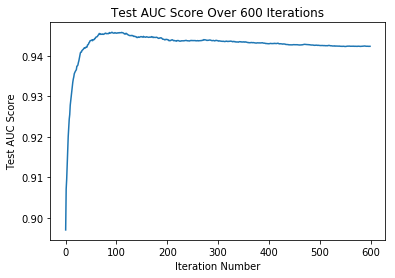

In [53]:
# Plot the test AUC scores for each iteration
plt.plot(cv['test-auc-mean'])
plt.title('Test AUC Score Over 600 Iterations')
plt.xlabel('Iteration Number')
plt.ylabel('Test AUC Score')
plt.show()

In [54]:
from sklearn.model_selection import cross_val_score
# Create a gradient boosted tree model using two hyperparameters
gbt = xgb.XGBClassifier(learning_rate= 0.1, max_depth = 7)

# Calculate the cross validation scores for 4 folds
cv_scores = cross_val_score(gbt, X_train, np.ravel(y_train), cv = 4)

# Print the cross validation scores
print(cv_scores)

# Print the average accuracy and standard deviation of the scores
print("Average accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(),
                                              cv_scores.std() * 2))

[0.93484163 0.93256393 0.93435944 0.93413309]
Average accuracy: 0.93 (+/- 0.00)


In [55]:
X_y_train = pd.concat([X_train.reset_index(drop = True),
                       y_train.reset_index(drop = True)], axis = 1)
count_nondefault, count_default = X_y_train['loan_status'].value_counts()

In [56]:
# Create data sets for defaults and non-defaults
nondefaults = X_y_train[X_y_train['loan_status'] == 0]
defaults = X_y_train[X_y_train['loan_status'] == 1]

# Undersample the non-defaults
nondefaults_under = nondefaults.sample(count_default)

# Concatenate the undersampled nondefaults with defaults
X_y_train_under = pd.concat([nondefaults_under.reset_index(drop = True),
                             defaults.reset_index(drop = True)], axis = 0)

# Print the value counts for loan status
print(X_y_train_under['loan_status'].value_counts())

1    3882
0    3882
Name: loan_status, dtype: int64


In [57]:
X2=X_y_train_under.drop(['loan_status'],axis=1)
y2=X_y_train_under['loan_status']
X1=cr_loan_prep.drop(['loan_status'],axis=1)
y1=cr_loan_prep['loan_status']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.4, random_state=12)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.4, random_state=42)
gbt2 = xgb.XGBClassifier().fit(X2_train,np.ravel(y2_train))
gbt2_preds=gbt2.predict(X2_test)
gbt1 = xgb.XGBClassifier().fit(X1_train,np.ravel(y1_train))
gbt1_preds=gbt1.predict(X1_test)

In [58]:
# Check the classification reports
target_names = ['Non-Default', 'Default']
print(classification_report(y1_test, gbt1_preds, target_names=target_names))
print(classification_report(y2_test, gbt2_preds, target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.92      0.99      0.95      9186
     Default       0.95      0.70      0.80      2598

   micro avg       0.92      0.92      0.92     11784
   macro avg       0.94      0.84      0.88     11784
weighted avg       0.93      0.92      0.92     11784

              precision    recall  f1-score   support

 Non-Default       0.80      0.92      0.86      1519
     Default       0.91      0.79      0.84      1587

   micro avg       0.85      0.85      0.85      3106
   macro avg       0.86      0.85      0.85      3106
weighted avg       0.86      0.85      0.85      3106



In [59]:
# Print the confusion matrix for both old and new models
print(metrics.confusion_matrix(y1_test,gbt1_preds))
print(metrics.confusion_matrix(y2_test,gbt2_preds))

[[9094   92]
 [ 792 1806]]
[[1397  122]
 [ 339 1248]]


In [60]:
# Print and compare the AUC scores of the old and new models
print(metrics.roc_auc_score(y1_test, gbt1_preds))
print(metrics.roc_auc_score(y2_test, gbt2_preds))

0.8425674374449722
0.8530367083109847


In [61]:
# Save the trained model as a pickle string. 
saved_gbt = pickle.dumps(gbt2)

## Model Evaluation and Implementation

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=40)

In [63]:
# Load the pickled model 
lr_from_pickle = pickle.loads(saved_lr) 
  
# Use the loaded pickled model to make predictions 
preds_lr_loan_prob=lr_from_pickle.predict_proba(X_test)
lr_preds_df = pd.DataFrame(preds_lr_loan_prob[:,1], columns = ['prob_default'])
lr_preds_df['loan_status'] = lr_preds_df['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)


In [64]:
lr_preds_df

,prob_default,loan_status
0,0.269379,0
1,0.398074,0
2,0.097557,0
3,0.480300,1
4,0.136898,0
5,0.223548,0
6,0.344578,0
7,0.314138,0
8,0.522548,1
9,0.241417,0


In [65]:
gbt_from_pickle=pickle.loads(saved_gbt)
preds_gbt_loan_prob=gbt_from_pickle.predict_proba(X_test)
gbt_preds_df = pd.DataFrame(preds_gbt_loan_prob[:,1], columns = ['prob_default'])
gbt_preds_df['loan_status'] = gbt_preds_df['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)

In [66]:
# Print the logistic regression classification report
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, lr_preds_df['loan_status'], target_names=target_names))

# Print the gradient boosted tree classification report
print(classification_report(y_test, gbt_preds_df['loan_status'], target_names=target_names))

# Print the default F-1 scores for the logistic regression
print(precision_recall_fscore_support(y_test, lr_preds_df['loan_status'], average = 'macro')[2])

# Print the default F-1 scores for the gradient boosted tree
print(precision_recall_fscore_support(y_test, gbt_preds_df['loan_status'], average = 'macro')[2])

              precision    recall  f1-score   support

 Non-Default       0.86      0.92      0.89      9203
     Default       0.63      0.45      0.53      2581

   micro avg       0.82      0.82      0.82     11784
   macro avg       0.74      0.69      0.71     11784
weighted avg       0.81      0.82      0.81     11784

              precision    recall  f1-score   support

 Non-Default       0.95      0.86      0.90      9203
     Default       0.62      0.83      0.71      2581

   micro avg       0.85      0.85      0.85     11784
   macro avg       0.79      0.85      0.81     11784
weighted avg       0.88      0.85      0.86     11784

0.7077629139540669
0.8076948004852564


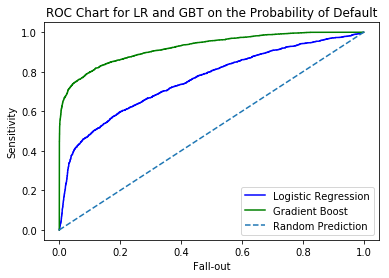

In [68]:
from sklearn import metrics
# ROC chart components
fallout_lr, sensitivity_lr, thresholds_lr = metrics.roc_curve(y_test, preds_lr_loan_prob[:,1])
fallout_gbt, sensitivity_gbt, thresholds_gbt = metrics.roc_curve(y_test, preds_gbt_loan_prob[:,1])

# ROC Chart with both
plt.plot(fallout_lr, sensitivity_lr, color = 'blue', label='%s' % 'Logistic Regression')
plt.plot(fallout_gbt, sensitivity_gbt, color = 'green', label='%s' % 'Gradient Boost')
plt.plot([0, 1], [0, 1], linestyle='--', label='%s' % 'Random Prediction')
plt.title("ROC Chart for LR and GBT on the Probability of Default")
plt.xlabel('Fall-out')
plt.ylabel('Sensitivity')
plt.legend()
plt.show()

In [70]:
# Print the logistic regression AUC with formatting
print("Logistic Regression AUC Score: %0.2f" % metrics.roc_auc_score(y_test, preds_lr_loan_prob[:,1]))

# Print the gradient boosted tree AUC with formatting
print("Gradient Boosted Tree AUC Score: %0.2f" % metrics.roc_auc_score(y_test, preds_gbt_loan_prob[:,1]))

Logistic Regression AUC Score: 0.76
Gradient Boosted Tree AUC Score: 0.92


### Calibration Curves

In [71]:
from sklearn.calibration import calibration_curve
lr_calib=calibration_curve(y_test,preds_lr_loan_prob[:,1] , n_bins = 50)
frac_of_pos_lr=lr_calib[0]
mean_pred_val_lr=lr_calib[1]

In [72]:
gbt_calib=calibration_curve(y_test,preds_gbt_loan_prob[:,1] , n_bins = 50)
frac_of_pos_gbt=gbt_calib[0]
mean_pred_val_gbt=gbt_calib[1]

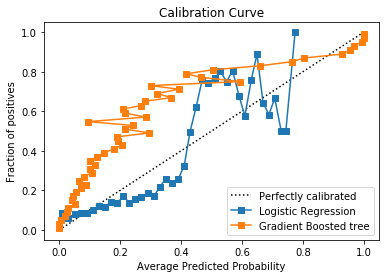

In [73]:
# Add the calibration curve for the gradient boosted tree
plt.plot([0, 1], [0, 1], 'k:', label='Perfectly calibrated')    
plt.plot(mean_pred_val_lr, frac_of_pos_lr,
         's-', label='%s' % 'Logistic Regression')
plt.plot(frac_of_pos_gbt, mean_pred_val_gbt,
         's-', label='%s' % 'Gradient Boosted tree')
plt.ylabel('Fraction of positives')
plt.xlabel('Average Predicted Probability')
plt.legend()
plt.title('Calibration Curve')
plt.show()

### Acceptance Rate

In [74]:
gbt_preds_df.head()

,prob_default,loan_status
0,0.358530,0
1,0.562972,1
2,0.124799,0
3,0.696916,1
4,0.885151,1


In [75]:
test_value=pd.DataFrame(y_test.values,columns = ['true_loan_status'])

In [76]:
gbt_preds_df['true_loan_status']=test_value['true_loan_status']

In [77]:
gbt_preds_df.head()

,prob_default,loan_status,true_loan_status
0,0.358530,0,0
1,0.562972,1,0
2,0.124799,0,0
3,0.696916,1,0
4,0.885151,1,1


In [78]:
gbt_df=gbt_preds_df.drop('loan_status',axis=1)

In [79]:
# Check the statistics of the probabilities of default
print(gbt_preds_df['prob_default'].describe())

# Calculate the threshold for a 85% acceptance rate
threshold_85 = np.quantile(gbt_preds_df['prob_default'], 0.85)

# Apply acceptance rate threshold
gbt_preds_df['pred_loan_status'] = gbt_preds_df['prob_default'].apply(lambda x: 1 if x > threshold_85 else 0)

# Print the counts of loan status after the threshold
print(gbt_preds_df['pred_loan_status'].value_counts())

count    11784.000000
mean         0.340869
std          0.306984
min          0.000936
25%          0.112744
50%          0.224789
75%          0.470235
max          0.999616
Name: prob_default, dtype: float64
0    10016
1     1768
Name: pred_loan_status, dtype: int64


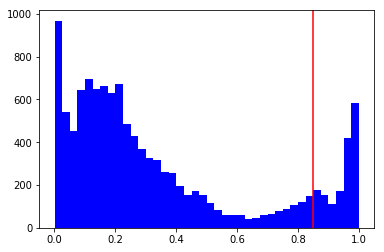

In [80]:
# Plot the predicted probabilities of default
plt.hist(gbt_preds_df['prob_default'], color = 'blue', bins = 40)

# Calculate the threshold with quantile
threshold = np.quantile(gbt_preds_df['prob_default'], 0.85)

# Add a reference line to the plot for the threshold
plt.axvline(x = 0.85, color = 'red')
plt.show()

### Bad Rates

In [81]:
# Print the top 5 rows of the new data frame
print(gbt_preds_df.head())

# Create a subset of only accepted loans
accepted_loans = gbt_preds_df[gbt_preds_df['pred_loan_status'] == 0]

# Calculate the bad rate
print(np.sum(accepted_loans['true_loan_status']) / accepted_loans['true_loan_status'].count())

   prob_default  loan_status  true_loan_status  pred_loan_status
0      0.358530            0                 0                 0
1      0.562972            1                 0                 0
2      0.124799            0                 0                 0
3      0.696916            1                 0                 0
4      0.885151            1                 1                 1
0.09145367412140575


In [82]:
accepted_loans['pred_loan_status_15']=gbt_preds_df['prob_default'].apply(lambda x: 1if x > 0.85 else 0)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [83]:
loan_amnt=X_test['loan_amnt'].reset_index()

In [84]:
accepted_loans['loan_amnt']=loan_amnt['loan_amnt']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [85]:
# Print the statistics of the loan amount column
print(accepted_loans['loan_amnt'].describe())

# Store the average loan amount
avg_loan = np.average(accepted_loans['loan_amnt'])

# Set the formatting for currency, and print the cross tab\
print(pd.crosstab(accepted_loans['true_loan_status'],
                 accepted_loans['pred_loan_status_15']).apply(lambda x: x * avg_loan, axis = 0))

count    10016.000000
mean      9285.989916
std       6082.891694
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12000.000000
max      35000.000000
Name: loan_amnt, dtype: float64
pred_loan_status_15             0
true_loan_status                 
0                    8.450251e+07
1                    8.505967e+06


In [86]:
accept_rates=[1.0, 0.95,0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]

In [87]:
thresholds=[]
bad_rates=[]
# Populate the arrays for the strategy table with a for loop
for rate in accept_rates:
    # Calculate the threshold for the acceptance rate
    thresh = np.quantile(accepted_loans['prob_default'], rate).round(3)
    # Add the threshold value to the list of thresholds
    thresholds.append(np.quantile(accepted_loans['prob_default'], rate).round(3))
    # Reassign the loan_status value using the threshold
    accepted_loans['pred_loan_status'] = accepted_loans['prob_default'].apply(lambda x: 1 if x > thresh else 0)
    # Create a set of accepted loans using this acceptance rate
    good_loans = accepted_loans[accepted_loans['pred_loan_status'] == 0]
    # Calculate and append the bad rate using the acceptance rate
    bad_rates.append(np.sum((good_loans['true_loan_status']) / len(good_loans['true_loan_status'])).round(3))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [88]:
good_loans

,prob_default,loan_status,true_loan_status,pred_loan_status,pred_loan_status_15,loan_amnt
40,0.010300,0,0,0,0,6200
120,0.013113,0,0,0,0,20000
131,0.008539,0,0,0,0,6450
133,0.012790,0,0,0,0,5500
167,0.012161,0,0,0,0,13000
185,0.010259,0,0,0,0,8000
193,0.011738,0,0,0,0,3300
230,0.011144,0,0,0,0,14000
233,0.009407,0,0,0,0,11000
240,0.009541,0,0,0,0,6000


In [91]:
# Create a data frame of the strategy table
strat_df = pd.DataFrame(zip(accept_rates, thresholds, bad_rates),
                        columns = ['Acceptance Rate','Threshold','Bad Rate'])

# Print the entire table
print(strat_df)

    Acceptance Rate  Threshold  Bad Rate
0              1.00      0.825     0.091
1              0.95      0.683     0.073
2              0.90      0.498     0.063
3              0.85      0.419     0.055
4              0.80      0.365     0.048
5              0.75      0.325     0.045
6              0.70      0.288     0.040
7              0.65      0.258     0.037
8              0.60      0.230     0.034
9              0.55      0.211     0.029
10             0.50      0.191     0.026
11             0.45      0.172     0.023
12             0.40      0.153     0.019
13             0.35      0.133     0.017
14             0.30      0.115     0.012
15             0.25      0.098     0.008
16             0.20      0.078     0.005
17             0.15      0.050     0.000
18             0.10      0.027     0.000
19             0.05      0.014     0.000


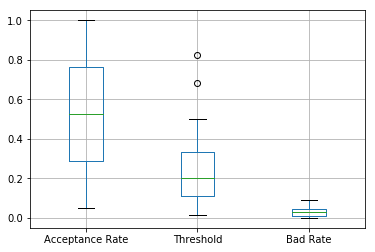

In [92]:
# Visualize the distributions in the strategy table with a boxplot
strat_df.boxplot()
plt.show()

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


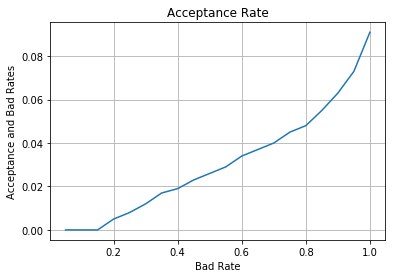

In [93]:
# Plot the strategy curve
plt.plot(strat_df['Acceptance Rate'], strat_df['Bad Rate'])
plt.title('Acceptance Rate')
plt.xlabel('Bad Rate')
plt.ylabel('Acceptance and Bad Rates')
plt.axes().yaxis.grid()
plt.axes().xaxis.grid()
plt.show()

In [94]:
# Print the contents of the strategy df
print(strat_df)

    Acceptance Rate  Threshold  Bad Rate
0              1.00      0.825     0.091
1              0.95      0.683     0.073
2              0.90      0.498     0.063
3              0.85      0.419     0.055
4              0.80      0.365     0.048
5              0.75      0.325     0.045
6              0.70      0.288     0.040
7              0.65      0.258     0.037
8              0.60      0.230     0.034
9              0.55      0.211     0.029
10             0.50      0.191     0.026
11             0.45      0.172     0.023
12             0.40      0.153     0.019
13             0.35      0.133     0.017
14             0.30      0.115     0.012
15             0.25      0.098     0.008
16             0.20      0.078     0.005
17             0.15      0.050     0.000
18             0.10      0.027     0.000
19             0.05      0.014     0.000


In [118]:
strat_df['Avg Loan Amnt']=avg_loan_amnt

In [104]:
accept_rates

[1.0,
 0.95,
 0.9,
 0.85,
 0.8,
 0.75,
 0.7,
 0.65,
 0.6,
 0.55,
 0.5,
 0.45,
 0.4,
 0.35,
 0.3,
 0.25,
 0.2,
 0.15,
 0.1,
 0.05]

In [141]:
a=[]
for i in range(len(accept_rates)):
    a.append(np.sum(accepted_loans['prob_default'].apply(lambda x: 1 if (x < accept_rates[i]) else 0)))

In [142]:
strat_df['Num Accepted Loans']=a

In [143]:
a

[10016,
 10016,
 10016,
 10016,
 9897,
 9704,
 9560,
 9451,
 9353,
 9232,
 9030,
 8706,
 8350,
 7832,
 7188,
 6389,
 5230,
 3927,
 2573,
 1491]

In [144]:
b=[]
for i in range(len(accept_rates)):
    b.append(strat_df['Num Accepted Loans'][i]*strat_df['Avg Loan Amnt'][i]*(1-2*strat_df['Bad Rate'][i]))

In [145]:
strat_df['Estimated Value']=b

In [146]:
strat_df

,Acceptance Rate,Threshold,Bad Rate,Avg Loan Amnt,Num Accepted Loans,Estimated Value
0,1.00,0.825,0.091,9584.744612,10016,7.852866e+07
1,0.95,0.683,0.073,9584.744612,10016,8.198468e+07
2,0.90,0.498,0.063,9584.744612,10016,8.390470e+07
3,0.85,0.419,0.055,9584.744612,10016,8.544071e+07
4,0.80,0.365,0.048,9584.744612,9897,8.575364e+07
5,0.75,0.325,0.045,9584.744612,9704,8.463943e+07
6,0.70,0.288,0.040,9584.744612,9560,8.429975e+07
7,0.65,0.258,0.037,9584.744612,9451,8.388210e+07
8,0.60,0.230,0.034,9584.744612,9353,8.355018e+07
9,0.55,0.211,0.029,9584.744612,9232,8.335415e+07


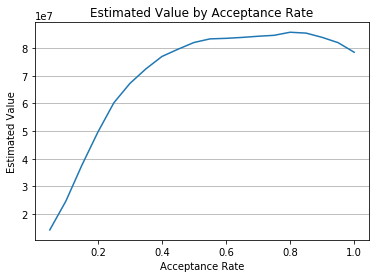

In [147]:
# Create a line plot of estimated value
plt.plot(strat_df['Acceptance Rate'],strat_df['Estimated Value'])
plt.title('Estimated Value by Acceptance Rate')
plt.xlabel('Acceptance Rate')
plt.ylabel('Estimated Value')
plt.axes().yaxis.grid()
plt.show()

In [148]:
# Print the row with the max estimated value
print(strat_df.loc[strat_df['Estimated Value'] == np.max(strat_df['Estimated Value'])])

   Acceptance Rate  Threshold  Bad Rate  Avg Loan Amnt  Num Accepted Loans  \
4              0.8      0.365     0.048    9584.744612                9897   

   Estimated Value  
4     8.575364e+07  


### Total expected loss

In [174]:
# Calculate the bank's expected loss and assign it to a new column
portfolio['expected_loss'] = portfolio['gbt_prob_default'] * 1 * portfolio['loan_amnt']

# Calculate the total expected loss to two decimal places
tot_exp_loss = round(np.sum(gbt_preds_df['expected_loss']),2)

# Print the total expected loss
print('Total expected loss: ', tot_exp_loss)

Total expected loss:  40927330.0
